In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 10

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
ny_pois_ids = np.loadtxt("ny_municipality_pois_id.csv")

# This dictionary maps attributes in the table with correct data types
d_types = {'@type':str, '@lat':float, '@lon':float, 'amenity':str, 'name':str, 
           'shop':str, 'public_transport':str, 'highway':str}
all_pois_df = pd.read_csv("pois_all_info", sep='\t', index_col='@id', dtype=d_types)

pois_df = all_pois_df.loc[ny_pois_ids]
pois_df.isna().sum()

@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

In [4]:
from collections import Counter

def get_categories():
    return [ 'amenity', 'shop', 'public_transport', 'highway']

cats = get_categories()

check_df = pois_df[cats]
row_nans = check_df.isna().sum(axis=1)
print(Counter(row_nans))


Counter({3: 37320, 4: 10208, 2: 6022})


In [9]:
pois_df[row_nans == 2].head()


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
418520887,node,40.636888,-74.076675,cafe,Everything Goes Book Cafe,books,NaN,NaN
419363225,node,40.718576,-73.945141,NaN,NaN,NaN,platform,bus_stop
419363978,node,40.673832,-74.011733,NaN,Dwight Street & Van Dyke Street,NaN,platform,bus_stop
502792663,node,40.743007,-73.825372,NaN,Main Street & 60th Avenue,NaN,platform,bus_stop
502793612,node,40.756968,-73.828784,NaN,Main Street & Sanford Avenue,NaN,platform,bus_stop


In [53]:
def get_top_perc(series, perc_value=.8):
    perc = series.cumsum() / series.sum()      # percentuale cumulativa
    arg = (perc >= perc_value).values.argmax()  # trova il punto in cui si supera la soglia
    return series.iloc[:arg+1]                 # restituisce solo i tipi fino a quel punto



In [52]:
x = pois_df['amenity'].value_counts()
print(x.sum())
get_top_perc(x, perc_value=.8)


24712


amenity
bicycle_parking    6052
restaurant         4156
fast_food          1531
cafe               1374
post_box           1093
                   ... 
school              912
drinking_water      862
bar                 821
bank                657
pharmacy            542
Name: count, Length: 12, dtype: int64

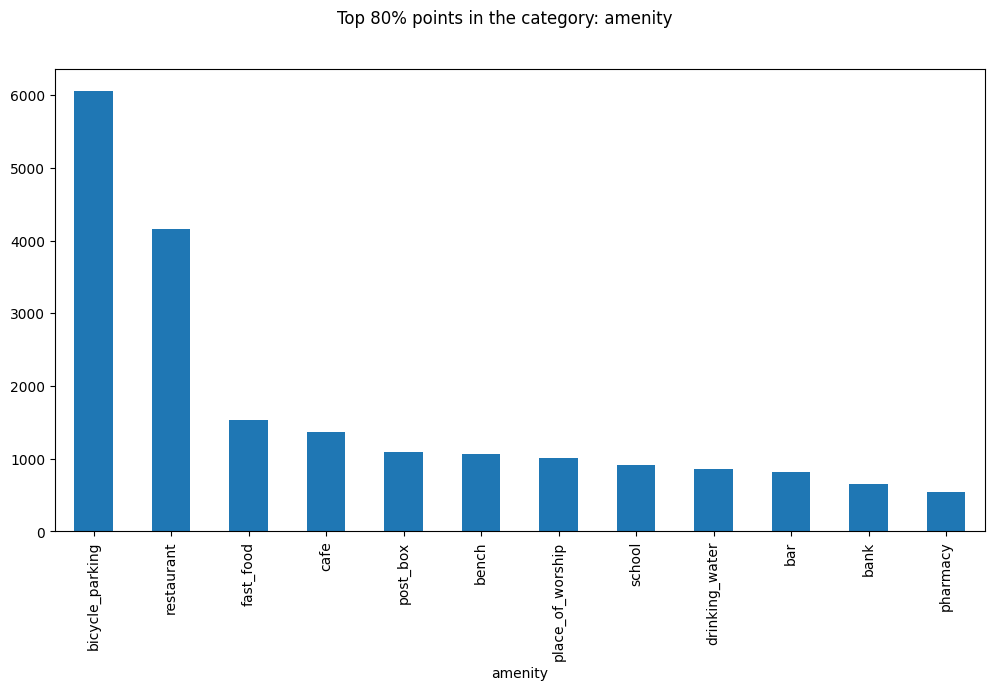

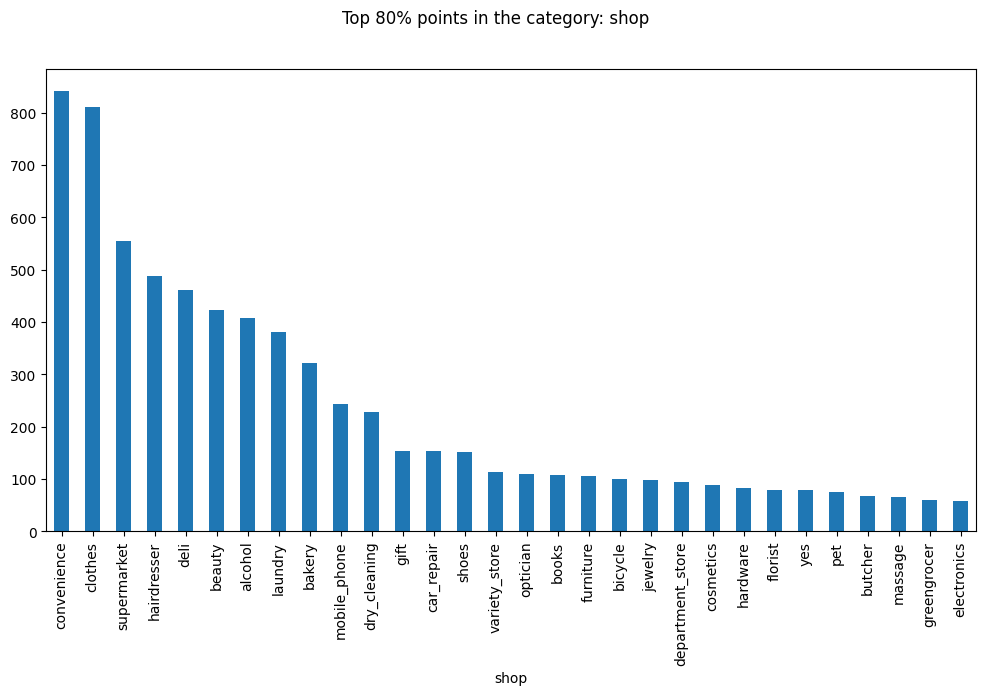

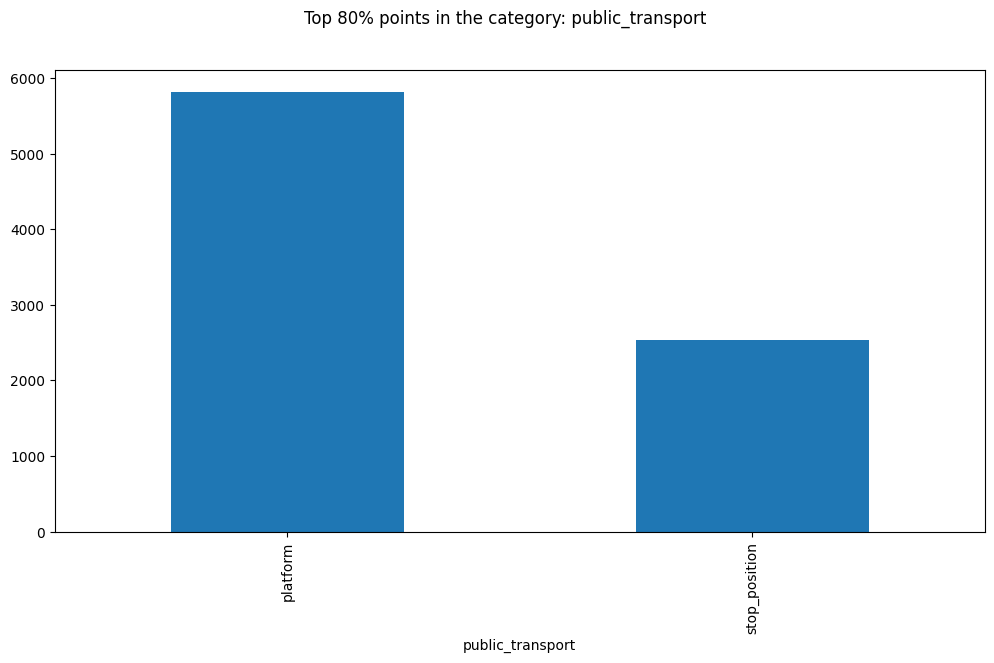

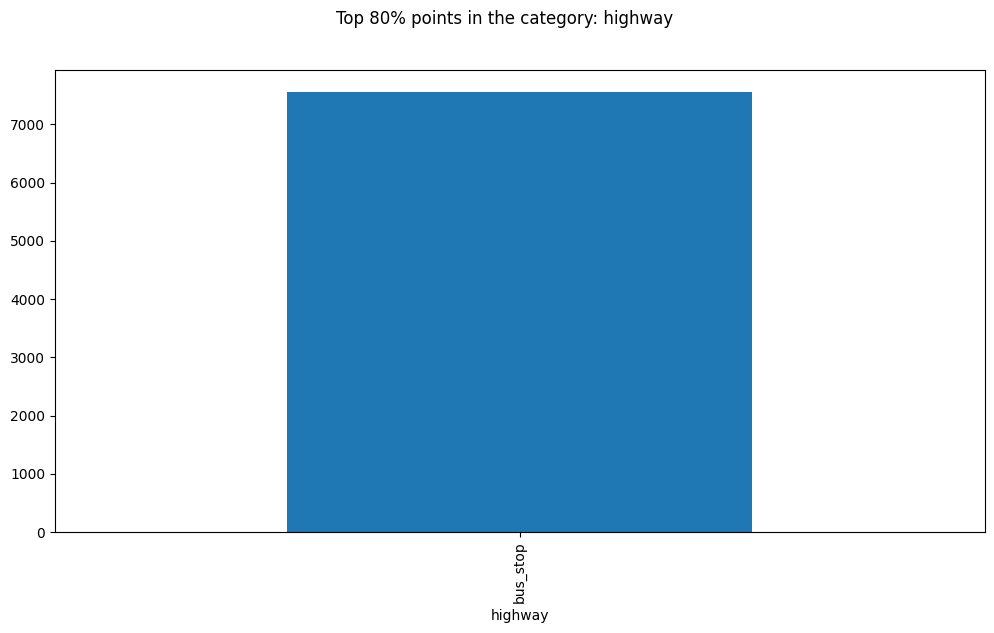

In [11]:
for col in get_categories():
    p = .8
    valc = pois_df[col].value_counts()     # conta quante volte compare ciascun tipo
    valf = get_top_perc(valc, p)           # tiene solo i più frequenti
    fig, ax = plt.subplots()
    valf.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    fig.suptitle(f"Top {p*100:.0f}% points in the category: {col}")
